# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/PIAIC-ASSIGNMENTS/DLAssignments/Data

/content/drive/MyDrive/PIAIC-ASSIGNMENTS/DLAssignments/Data


In [19]:
ConcreteData=pd.read_csv('./compresive_strength_concrete.csv')

In [33]:
print(ConcreteData.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [20]:
ConcreteData.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
ConcreteData.shape

(1030, 9)

In [22]:
ConcreteData.isnull().sum().sum()

0

In [23]:
mean = ConcreteData.iloc[:,:].mean(axis=0) # taking the mean of 

ConcreteData.iloc[:,:] -= mean

std = ConcreteData.iloc[:,:].std(axis=0)

ConcreteData.iloc[:,:] /= std

ConcreteData

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


In [26]:
Train_ConcreteData,Test_ConcreteData=train_test_split(ConcreteData,test_size = 0.3 , random_state = 1)

In [27]:
print(Train_ConcreteData.shape,Test_ConcreteData.shape)

(721, 9) (309, 9)


In [34]:
Train_ConcreteData_Input=(Train_ConcreteData.loc[:,Train_ConcreteData.columns!='Concrete compressive strength(MPa, megapascals) '])
Train_ConcreteData_Result=(Train_ConcreteData.loc[:,Train_ConcreteData.columns=='Concrete compressive strength(MPa, megapascals) '])

Test_ConcreteData_Input=(Test_ConcreteData.loc[:,Test_ConcreteData.columns!='Concrete compressive strength(MPa, megapascals) '])
Test_ConcreteData_Result=(Test_ConcreteData.loc[:,Test_ConcreteData.columns=='Concrete compressive strength(MPa, megapascals) '])

print(Train_ConcreteData_Input.shape,Train_ConcreteData_Result.shape,Test_ConcreteData_Input.shape,Test_ConcreteData_Result.shape)


(721, 8) (721, 1) (309, 8) (309, 1)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from keras import regularizers

In [41]:
def Build_Model_Simple(act,inputShape):
  model = Sequential()
  model.add(Dense(8, activation= act,input_shape=(inputShape,)))
  model.add(Dense(6, activation= act))
  model.add(Dense(4, activation= act))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


In [45]:
k=4
num_of_val_samples=len(Train_ConcreteData_Input) // k
epoch=100
all_score_relu=[]
all_mae_history_relu=[]
for i in range(k):
  
  print('processing fold #', i)
  
  val_data_Input=Train_ConcreteData_Input[i*num_of_val_samples:(i+1)*num_of_val_samples]
  val_data_Result=Train_ConcreteData_Result[i*num_of_val_samples:(i+1)*num_of_val_samples]
  
  partial_train_Data_Input=np.concatenate([Train_ConcreteData_Input[:i * num_of_val_samples],Train_ConcreteData_Input[(i + 1) * num_of_val_samples:]],  axis=0)
  partial_train_Data_Result=np.concatenate([Train_ConcreteData_Result[:i * num_of_val_samples],Train_ConcreteData_Result[(i + 1) * num_of_val_samples:]],  axis=0)
  
  Simple_relu_Model=Build_Model_Simple('relu',8)
  
  ReluHistory=Simple_relu_Model.fit(partial_train_Data_Input,partial_train_Data_Result, epochs=80,batch_size=10,verbose=0)
    
  val_mse_relu,val_mae_relu=Simple_relu_Model.evaluate(val_data_Input,val_data_Result,verbose=0)


  mae_history_relu=ReluHistory.history['mae']
  all_score_relu.append(val_mae_relu)
  all_mae_history_relu.append(mae_history_relu)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [66]:
k=4
num_of_val_samples=len(Train_ConcreteData_Input) // k
epoch=100
all_score_tanh=[]
all_mae_history_tanh=[]
for i in range(k):
  
  print('processing fold #', i)
  
  val_data_Input=Train_ConcreteData_Input[i*num_of_val_samples:(i+1)*num_of_val_samples]
  val_data_Result=Train_ConcreteData_Result[i*num_of_val_samples:(i+1)*num_of_val_samples]
  
  partial_train_Data_Input=np.concatenate([Train_ConcreteData_Input[:i * num_of_val_samples],Train_ConcreteData_Input[(i + 1) * num_of_val_samples:]],  axis=0)
  partial_train_Data_Result=np.concatenate([Train_ConcreteData_Result[:i * num_of_val_samples],Train_ConcreteData_Result[(i + 1) * num_of_val_samples:]],  axis=0)
  
  Simple_tanh_Model=Build_Model_Simple('tanh',8)
  
  TanhHistory=Simple_tanh_Model.fit(partial_train_Data_Input,partial_train_Data_Result, epochs=80,batch_size=10,verbose=0)
  
  
  val_mse_tanh,val_mae_tanh=Simple_tanh_Model.evaluate(val_data_Input,val_data_Result,verbose=0)

  mae_history_tanh=TanhHistory.history['mae']
  all_score_tanh.append(val_mae_tanh)
  all_mae_history_tanh.append(mae_history_tanh)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [68]:
average_mae_history_relu=[np.mean([x[i] for x in all_mae_history_relu]) for i in range(80)]
print("All fold Validation Relu Error : ",all_score_relu)
print("Mean of all fold Relu validation error", np.mean(all_score_relu))
print("average mae history Relu ", average_mae_history_relu)

All fold Validation Error :  [0.3044928312301636, 0.30102625489234924, 0.32052701711654663, 0.3282442092895508]
Mean of all fold validation error 0.31357257813215256
average mae history [0.7953460365533829, 0.7451059073209763, 0.6951446086168289, 0.6474829465150833, 0.6040301620960236, 0.5689690858125687, 0.5421842485666275, 0.5212438255548477, 0.5024739056825638, 0.488995224237442, 0.4774414449930191, 0.46776456385850906, 0.4583936557173729, 0.45043669641017914, 0.4430220127105713, 0.4351515397429466, 0.426268070936203, 0.41843558102846146, 0.41032708436250687, 0.4018789082765579, 0.39449602365493774, 0.3878607153892517, 0.3812010660767555, 0.3743761479854584, 0.36751487106084824, 0.3615729808807373, 0.3573760315775871, 0.3521165996789932, 0.3465168848633766, 0.3413867801427841, 0.337145172059536, 0.33393216133117676, 0.3291766941547394, 0.32569070160388947, 0.3223389685153961, 0.31945493072271347, 0.31652648001909256, 0.31457583606243134, 0.3120882958173752, 0.3099028393626213, 0.309

In [70]:
average_mae_history_tanh=[np.mean([x[i] for x in all_mae_history_tanh]) for i in range(80)]
print("All fold Validation Tanh Error : ",all_score_tanh)
print("Mean of all fold Tanh validation error", np.mean(all_score_tanh))
print("average mae historyTanh ", average_mae_history_tanh)

All fold Validation Tanh Error :  [0.29971200227737427, 0.26655876636505127, 0.28341370820999146, 0.2916114032268524]
Mean of all fold Tanh validation error 0.28532397001981735
average mae historyTanh  [0.7524856626987457, 0.6436996459960938, 0.5749616995453835, 0.5286775007843971, 0.4959990978240967, 0.47305069118738174, 0.45466404408216476, 0.4414137303829193, 0.4278944730758667, 0.41706905514001846, 0.40819548815488815, 0.40155602991580963, 0.3930821195244789, 0.38595325499773026, 0.3790974095463753, 0.37334201484918594, 0.36762408912181854, 0.36061254143714905, 0.35683227330446243, 0.352468803524971, 0.3474799022078514, 0.34308258444070816, 0.3392670601606369, 0.33643894642591476, 0.333582304418087, 0.3296644613146782, 0.32545241713523865, 0.32422516494989395, 0.3233706057071686, 0.32130807638168335, 0.316619835793972, 0.3155969902873039, 0.31237009167671204, 0.3096775710582733, 0.3083244264125824, 0.3074834868311882, 0.3031558468937874, 0.302234947681427, 0.29944567382335663, 0.29

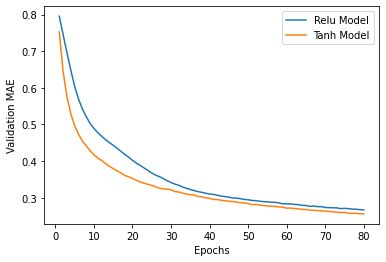

In [74]:
plt.plot(range(1,len(average_mae_history_relu)+1),average_mae_history_relu, label="Relu Model")
plt.plot(range(1,len(average_mae_history_tanh)+1),average_mae_history_tanh, label="Tanh Model")
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [75]:
CalcVal_Relu=Simple_relu_Model.predict(Test_ConcreteData_Input)
CalcVal_Tanh=Simple_tanh_Model.predict(Test_ConcreteData_Input)

In [89]:
print(len(CalcVal_Relu))

309
